# Parquet and GeoParquet

**Apache Parquet** (or just parquet) is an open-source, column-oriented file format that makes it faster to retrieve data and uses less memory space to store tabular data. It is very popular for storing large amounts of data, instead of using, for example, CSV files.

It is very popular for big data repositories

The geospatial version of parquet for storing vector data is the **GeoParquet** data format. 

This format comes from the necessity to have an efficient, standardized data format to store and query big geospatial data efficiently. 

GeoParquet was first introduced in December 2022. Similarly to STAC, this is a new and ongoing effort to create standards in the geospatial analysis community given the rapid increase in geospatial data available.

## Catalog Search

In [29]:
#Import all necessary libraries

import geopandas as gpd
import matplotlib.pyplot as plt

import pystac_client
import planetary_computer

import contextily as ctx #for adding basemaps

Then we use the 2020 US Census Collection id, `us-census`, to look for the data in the MPC catalog. 

This collection has each tabular file as an item:

In [6]:
#open MPC catalog

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

#search for census collection
search = catalog.search(collections = ['us-census'])

In [7]:
#we are creating a dictionary
#for each item in id, we are asking to give us the item as well as the item id
#aka itemid:item
items = {item.id :item for item in search.items()}

In [4]:
#retrieve items
items = search.item_collection

In [9]:
items

{'2020-census-blocks-population': <Item id=2020-census-blocks-population>,
 '2020-census-blocks-geo': <Item id=2020-census-blocks-geo>,
 '2020-cb_2020_us_vtd_500k': <Item id=2020-cb_2020_us_vtd_500k>,
 '2020-cb_2020_us_unsd_500k': <Item id=2020-cb_2020_us_unsd_500k>,
 '2020-cb_2020_us_ttract_500k': <Item id=2020-cb_2020_us_ttract_500k>,
 '2020-cb_2020_us_tract_500k': <Item id=2020-cb_2020_us_tract_500k>,
 '2020-cb_2020_us_tbg_500k': <Item id=2020-cb_2020_us_tbg_500k>,
 '2020-cb_2020_us_state_500k': <Item id=2020-cb_2020_us_state_500k>,
 '2020-cb_2020_us_sldu_500k': <Item id=2020-cb_2020_us_sldu_500k>,
 '2020-cb_2020_us_sldl_500k': <Item id=2020-cb_2020_us_sldl_500k>,
 '2020-cb_2020_us_scsd_500k': <Item id=2020-cb_2020_us_scsd_500k>,
 '2020-cb_2020_us_region_500k': <Item id=2020-cb_2020_us_region_500k>,
 '2020-cb_2020_us_place_500k': <Item id=2020-cb_2020_us_place_500k>,
 '2020-cb_2020_us_nectadiv_500k': <Item id=2020-cb_2020_us_nectadiv_500k>,
 '2020-cb_2020_us_necta_500k': <Item id=20

In [11]:
item = items['2020-cb_2020_us_county_500k']

In [13]:
item

id: 2020-cb_2020_us_county_500k
"bbox: [-179.148909, -14.548699, 179.77847, 71.365162]"
datetime: 2021-08-01T00:00:00Z
proj:epsg: 4269
"table:columns: [{'name': 'STATEFP', 'type': 'byte_array', 'description': 'State FIPS Code'}, {'name': 'COUNTYFP', 'type': 'byte_array', 'description': 'County FIPS code'}, {'name': 'COUNTYNS', 'type': 'byte_array'}, {'name': 'AFFGEOID', 'type': 'byte_array', 'description': 'American FactFinder summary level code + geovariant code + ""00US"" + GEOID'}, {'name': 'GEOID', 'type': 'byte_array', 'description': 'Concatenation of State FIPS and county FIPS code'}, {'name': 'NAME', 'type': 'byte_array', 'description': 'County name'}, {'name': 'NAMELSAD', 'type': 'byte_array', 'description': 'Name and Legal/statistical description'}, {'name': 'STUSPS', 'type': 'byte_array', 'description': 'FIPS State Postal Code'}, {'name': 'STATE_NAME', 'type': 'byte_array'}, {'name': 'LSAD', 'type': 'byte_array', 'description': 'Legal/statistical classification'}, {'name': 'ALAND', 'type': 'int64', 'description': 'Current land area'}, {'name': 'AWATER', 'type': 'int64', 'description': 'Current water area'}, {'name': 'geometry', 'type': 'byte_array', 'description': 'coordinates for County polygons'}]"
table:row_count: 3234
https://stac-extensions.github.io/table/v1.2.0/schema.json
https://stac-extensions.github.io/projection/v1.0.0/schema.json
href: abfs://us-census/2020/cb_2020_us_county_500k.parquet
type: application/x-parquet
title: Dataset root


Notice each item has a single asset, `data`, that contains an URL to the GeoParquet file holding the information. Let’s access the item’s asset:

In [15]:
asset = item.assets['data']

In [16]:
asset

href: abfs://us-census/2020/cb_2020_us_county_500k.parquet
type: application/x-parquet
title: Dataset root
roles: ['data']
owner: 2020-cb_2020_us_county_500k
"table:storage_options: {'account_name': 'ai4edataeuwest', 'credential': 'st=2023-12-03T21%3A28%3A30Z&se=2023-12-11T21%3A28%3A30Z&sp=rl&sv=2021-06-08&sr=c&skoid=c85c15d6-d1ae-42d4-af60-e2ca0f81359b&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2023-12-04T21%3A28%3A29Z&ske=2023-12-11T21%3A28%3A29Z&sks=b&skv=2021-06-08&sig=WI6%2BLOPTtpi1sHUGjfbs74I1q51iysAir3IlbBghMJ4%3D'}"


## Opening (Geo)Parquet

To open the parquet file we use the `gpd.read_parquet()` function using the asset’s URL pointing to the data.

In [19]:
counties = gpd.read_parquet(asset.href,
                            storage_options = asset.extra_fields['table:storage_options'],)


In [20]:
print(type(counties))
counties.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,21,141,00516917,0500000US21141,21141,Logan,Logan County,KY,Kentucky,06,1430224002,12479211,"POLYGON ((-87.06037 36.68085, -87.06002 36.708..."
1,36,081,00974139,0500000US36081,36081,Queens,Queens County,NY,New York,06,281594050,188444349,"POLYGON ((-73.96262 40.73903, -73.96243 40.739..."
2,34,017,00882278,0500000US34017,34017,Hudson,Hudson County,NJ,New Jersey,06,119640822,41836491,"MULTIPOLYGON (((-74.04220 40.69997, -74.03900 ..."
3,34,019,00882228,0500000US34019,34019,Hunterdon,Hunterdon County,NJ,New Jersey,06,1108086284,24761598,"POLYGON ((-75.19511 40.57969, -75.19466 40.581..."
4,21,147,00516926,0500000US21147,21147,McCreary,McCreary County,KY,Kentucky,06,1105416696,10730402,"POLYGON ((-84.77845 36.60329, -84.73068 36.665..."


## Contectily
In this section we will introduce the Python library contextily to add base maps.

Contextily retrieves tile maps from the internet and makes it possible to plot them alongside our vector data.

Example

We want to plot the Santa Barbara county polygon together with a basemap.

In [21]:
sb = counties[counties.NAME == "Santa Barbara"]

<Axes: >

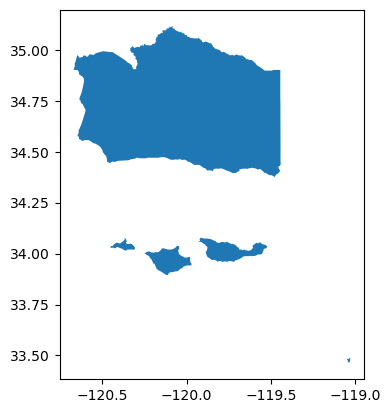

In [23]:
sb.plot()

Although contextily’s tiles can be reprojected to match the CRS of the vector data, it can be easier to reproject your data to EPSG 3857 instead. 

The CRS EPSG 3857 (Spherical Mercator / Web Mercator) is a projected coordinate system used for rendering maps online, including Google Maps and OpenStreetMap among others.

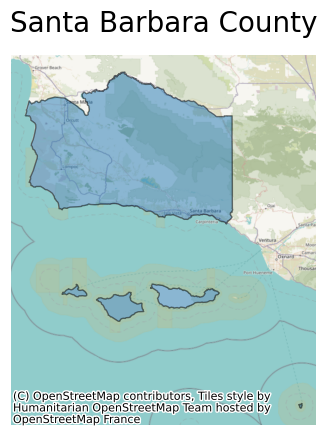

In [31]:
fig, ax = plt.subplots()

(sb.to_crs(epsg = 3857)
 .plot(ax = ax, figsize = (5,5), alpha = 0.5, edgecolor = 'k')
)

#add basemap
ctx.add_basemap(ax)

ax.set_title("Santa Barbara County", fontdict = {'fontsize':20})
ax.set_axis_off()